In [1]:
%pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [2]:
from lazypredict import Supervised

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
from lazypredict.Supervised import LazyRegressor

In [5]:
df=pd.read_csv('final_df_3.csv')

In [6]:
X=df.drop('pIC50',axis=1)
y=df['pIC50']

In [7]:
X.shape

(4695, 881)

In [8]:
from sklearn.feature_selection import VarianceThreshold
selection=VarianceThreshold(threshold=(.8*(1-.8)))
X=selection.fit_transform(X)

In [9]:
X.shape

(4695, 137)

In [10]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2)

In [11]:
lz=LazyRegressor(verbose=0,ignore_warnings=True,custom_metric=None)
train,test=lz.fit(X_test,X_train,y_test,y_train)

 98%|█████████▊| 41/42 [00:48<00:00,  1.63it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.822027


100%|██████████| 42/42 [00:49<00:00,  1.17s/it]


In [12]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.41,0.49,1.10,4.81
HistGradientBoostingRegressor,0.40,0.49,1.10,1.26
XGBRegressor,0.38,0.47,1.12,0.39
LGBMRegressor,0.38,0.47,1.12,0.39
BaggingRegressor,0.37,0.47,1.13,0.55
MLPRegressor,0.34,0.44,1.16,5.70
KNeighborsRegressor,0.33,0.43,1.16,0.11
NuSVR,0.32,0.42,1.18,1.45
SVR,0.32,0.42,1.18,1.81


In [13]:
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.41,0.49,1.10,4.81
HistGradientBoostingRegressor,0.40,0.49,1.10,1.26
XGBRegressor,0.38,0.47,1.12,0.39
LGBMRegressor,0.38,0.47,1.12,0.39
BaggingRegressor,0.37,0.47,1.13,0.55
MLPRegressor,0.34,0.44,1.16,5.70
KNeighborsRegressor,0.33,0.43,1.16,0.11
NuSVR,0.32,0.42,1.18,1.45
SVR,0.32,0.42,1.18,1.81


[(0.0, 1.0)]

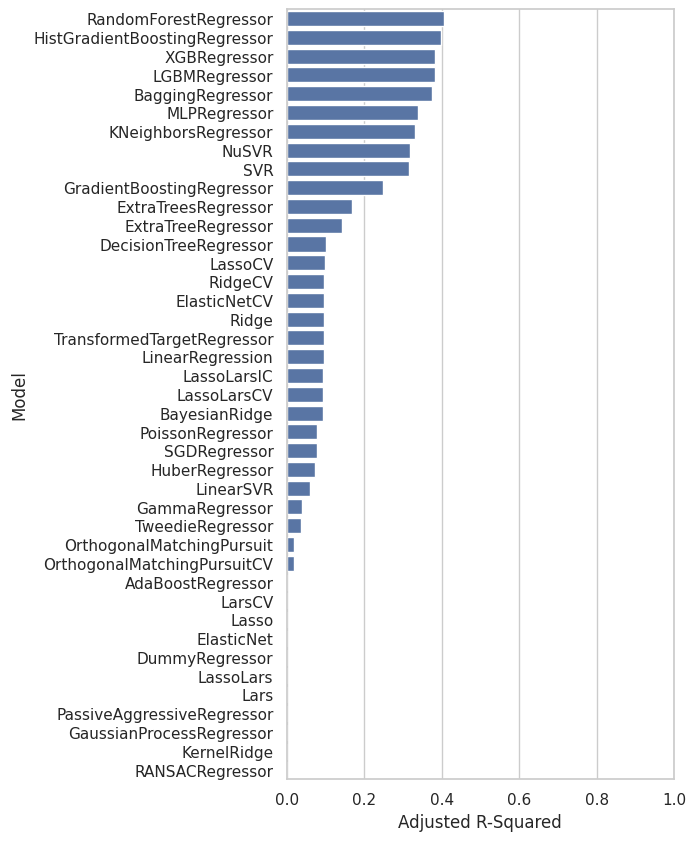

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,10))
sns.set_theme(style="whitegrid")
ax=sns.barplot(y=train.index,x='Adjusted R-Squared',data=train)
ax.set(xlim=(0,1))